In [ ]:
!pip install tensorflow #install tensorflow
!git clone https://github.com/OrcaBeaw/CapstoneC964_AliothDuran.git #clone git
%cd CapstoneC964_AliothDuran #change to folder

Cloning into 'CapstoneC964_AliothDuran'...
remote: Enumerating objects: 1897, done.
remote: Total 1897 (delta 0), reused 0 (delta 0), pack-reused 1897 (from 1)
Receiving objects: 100% (1897/1897), 102.66 MiB | 14.32 MiB/s, done.
Resolving deltas: 100% (1/1), done.
[Errno 2] No such file or directory: 'CapstoneC964_AliothDuran #change to folder'
/content


In [ ]:
#import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#Load dataset

batch_size = 32
img_height = 180
img_width = 180

dataset_dir = '/content/CapstoneC964_AliothDuran'

train_dataset = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_dataset.class_names
print(class_names)

Found 923 files belonging to 2 classes.
Using 739 files for training.
Found 923 files belonging to 2 classes.
Using 184 files for validation.
['bleached_corals', 'healthy_corals']


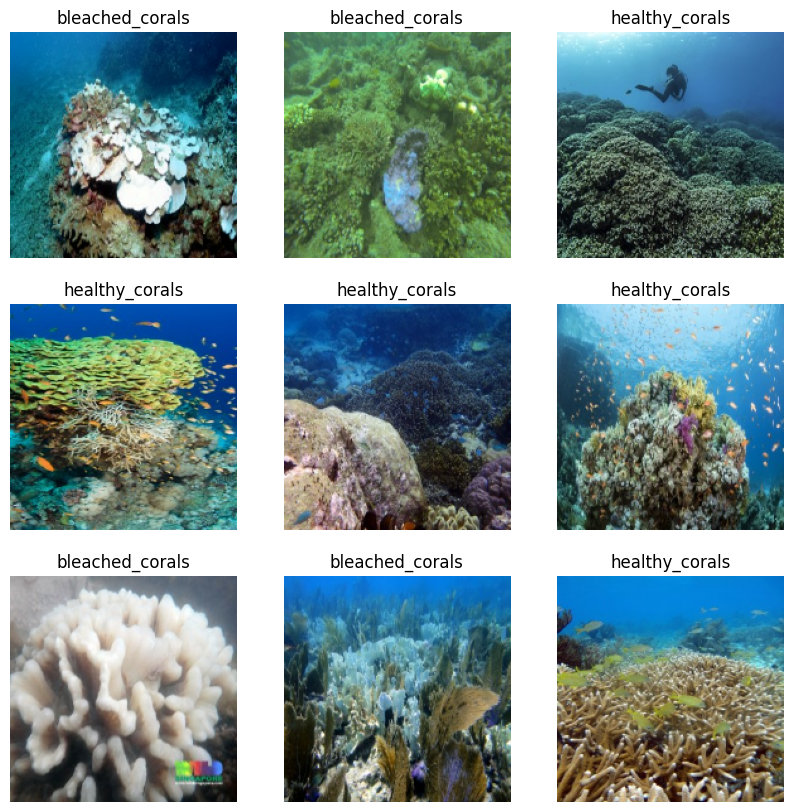

In [ ]:
#visualize data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
#standardize the data
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))


0.0 1.0


In [ ]:
#data augmentation
!pip install keras
from tensorflow import keras
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#creating the model
from tensorflow.keras.models import Sequential #Import the Sequential object
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout #Import the necessary layers

num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
#Compile the model
#In order for the table to fill out, it needs to be ran again after the everything runs once.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model
epochs=20
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.5944 - loss: 0.7325 - val_accuracy: 0.6467 - val_loss: 0.5966
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.7185 - loss: 0.5595 - val_accuracy: 0.6957 - val_loss: 0.5976
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7277 - loss: 0.5387 - val_accuracy: 0.6196 - val_loss: 0.6892
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7100 - loss: 0.5158 - val_accuracy: 0.7228 - val_loss: 0.6319
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7794 - loss: 0.4993 - val_accuracy: 0.7120 - val_loss: 0.5723
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7645 - loss: 0.4885 - val_accuracy: 0.7446 - val_loss: 0.6669
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7840 - loss: 0.4571 - val_accuracy: 0.7174 - val_loss: 0.5250
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7879 - loss: 0.4562 - val_accuracy: 0.6902 -

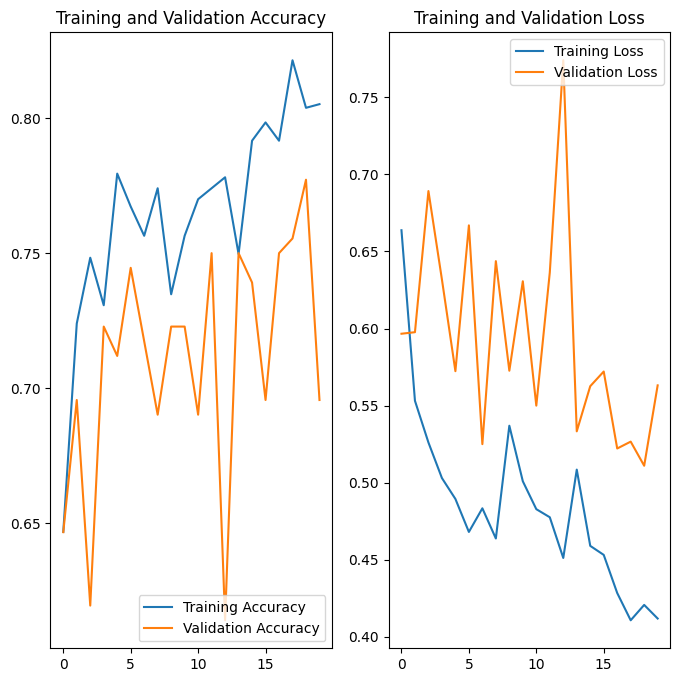

In [ ]:
#Visualize results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

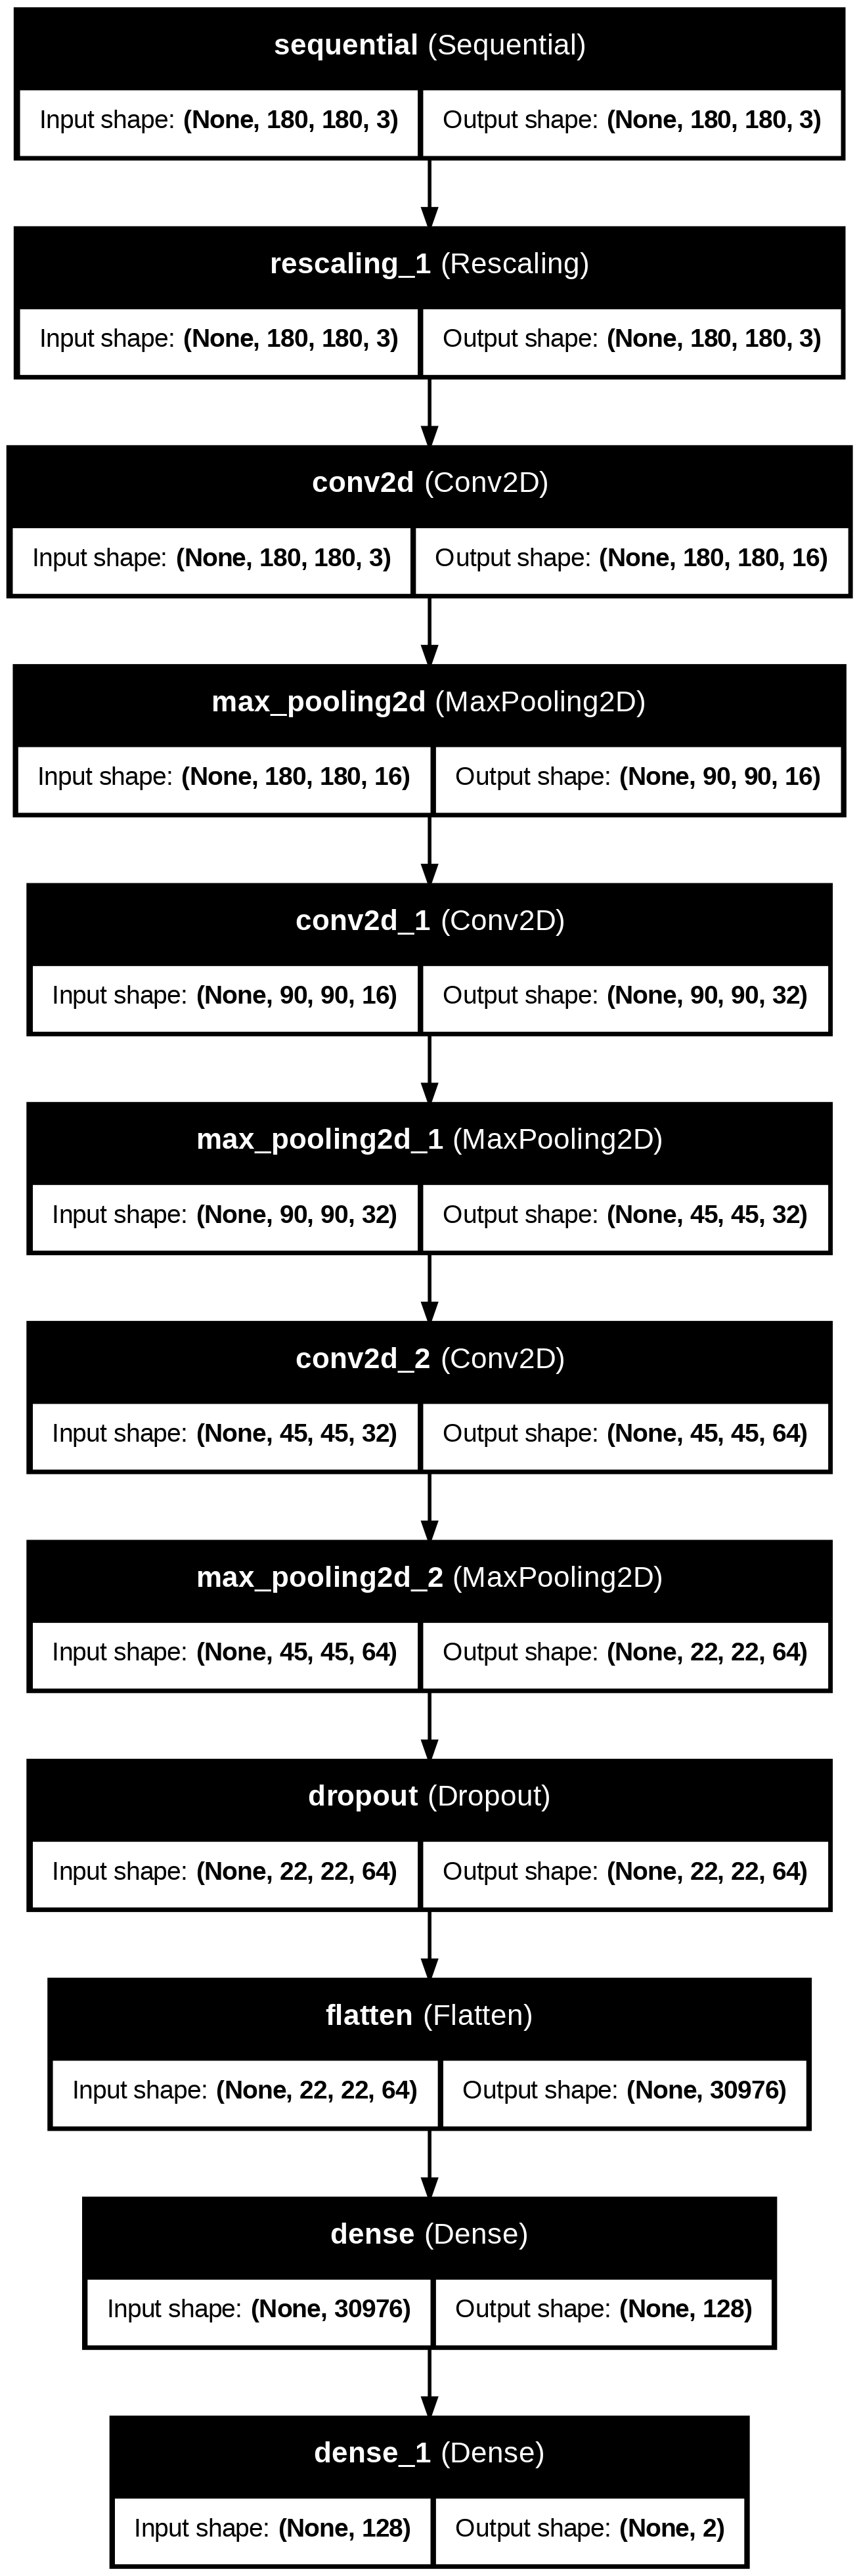

In [ ]:
#Model architecture diagram (Requires mouse scrolling)
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Content type: image/jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Image URL:  https://i0.wp.com/sitn.hms.harvard.edu/wp-content/uploads/2021/05/coral-bleaching.jpeg?resize=1500%2C768&ssl=1


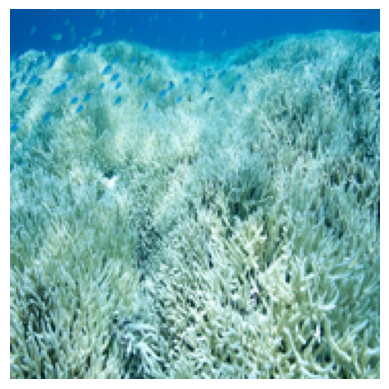

This image most likely belongs to bleached_corals with a 77.79 percent confidence.


In [ ]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import tensorflow as tf

# Link your image (Replace the URL)
coral_url = "https://i0.wp.com/sitn.hms.harvard.edu/wp-content/uploads/2021/05/coral-bleaching.jpeg?resize=1500%2C768&ssl=1"

# Download the image using requests
response = requests.get(coral_url)

# Check if the response is successful
if response.status_code == 200:
    print("Content type:", response.headers['Content-Type'])
    try:
        img = Image.open(BytesIO(response.content))
        img = img.resize((img_width, img_height))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        # Make predictions
        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])

        #print image
        print("Image URL: ",coral_url)
        plt.imshow(img)
        plt.axis("off")
        plt.show()

        # Print the results
        print(
            "This image most likely belongs to {} with a {:.2f} percent confidence."
            .format(class_names[np.argmax(score)], 100 * np.max(score))
        )
    except Exception as e:
        print("Error processing image:", e)
else:
    print("Failed to retrieve image:", response.status_code)